In [27]:
import numpy as np 
import pandas as pd 

In [28]:
test = pd.read_csv("test.csv") #Dataframe untuk Test machine learning kita
train = pd.read_csv("train.csv") #Dataframe yg akan kita latih

In [29]:
train['cluster_id'] = train['cluster_id'].str.replace('cluster_', '')
train['cluster_id'] = train['cluster_id'].astype(int)

In [30]:
train.head()

,ID,date,cluster_id,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,cluster_1_2014-01-01,2014-01-01,1,358.032,10.8,4.2,5.5,0.4,53.003333,29787.533333,40.6,79.2,186.000000,1.176667,0.483333
1,cluster_2_2014-01-01,2014-01-01,2,548.247,12.2,4.3,8.6,-0.4,8195.656667,30650.350000,36.0,81.7,170.591118,3.383333,0.736667
2,cluster_3_2014-01-01,2014-01-01,3,758.303,12.9,-0.8,10.1,-4.9,16305.260000,31547.686667,20.9,44.3,159.467752,3.880000,0.716667
3,cluster_4_2014-01-01,2014-01-01,4,1072.077,10.8,4.7,6.7,0.6,9224.803333,30769.220000,34.7,82.8,184.339753,3.153333,0.676667
4,cluster_1_2014-01-02,2014-01-02,1,386.908,10.7,7.0,6.6,3.3,22372.000000,29850.226667,34.3,75.2,210.333465,3.640000,0.780000


In [31]:
train.describe()

,cluster_id,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
count,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000
mean,2.500000,642.313328,18.733385,7.174786,17.215315,4.784608,29302.656241,44070.779592,23.273058,46.420115,202.335554,12.742257,2.428585
std,1.118082,287.673473,7.504161,5.960263,9.085303,7.260336,13600.113712,9283.839471,7.993389,15.226372,100.697741,7.588077,1.607845
min,1.000000,207.472000,-1.900000,-10.800000,-8.100000,-15.400000,0.000000,29447.550000,6.800000,13.300000,0.002855,0.333333,0.173333
25%,1.750000,414.376000,12.800000,2.500000,10.000000,-1.100000,19104.170833,35150.501667,17.400000,35.300000,134.384708,5.600000,0.990000
50%,2.500000,602.672000,18.200000,7.100000,16.400000,4.400000,29917.360000,44185.056667,22.000000,43.900000,219.000000,12.140000,2.156667
75%,3.250000,836.034500,24.300000,12.100000,24.000000,10.800000,40697.756667,52997.815833,28.000000,54.700000,281.609519,18.924167,3.616667
max,4.000000,1658.348000,40.900000,23.200000,42.600000,23.800000,53498.910000,58501.420000,63.900000,126.700000,360.000000,29.983333,8.133333


In [32]:
cluster_1 = train.groupby("cluster_id")['electricity_consumption'].mean()
cluster_1

cluster_id
1     340.734297
2     503.367172
3     706.762751
4    1018.389092
Name: electricity_consumption, dtype: float64

In [33]:
#mengecek berapa banyak unit per cluster.
train['cluster_id'].value_counts()

cluster_id
1    2922
2    2922
3    2922
4    2922
Name: count, dtype: int64

In [34]:
cluster_1 = train.groupby("cluster_id")
cluster_1

In [35]:
train.groupby("cluster_id")[["apparent_temperature_max", "apparent_temperature_min"]].describe()

apparent_temperature_max                                         \
                              count       mean       std  min   25%    50%   
cluster_id                                                                   
1                            2922.0  14.724367  8.355381 -7.8   8.0  14.05   
2                            2922.0  17.786003  9.077814 -4.4  10.5  17.15   
3                            2922.0  19.750479  8.717236 -0.9  12.5  19.10   
4                            2922.0  16.600411  9.418396 -8.1   8.8  15.90   

                         apparent_temperature_min                            \
               75%   max                    count      mean       std   min   
cluster_id                                                                    
1           20.900  39.7                   2922.0  4.703388  6.759332 -14.0   
2           24.600  42.6                   2922.0  4.392847  6.918329 -14.5   
3           26.900  42.5                   2922.0  5.219781  7.902081 -15.4   
4           23.675  42.1                   2922.0  4.822416  7.386360 -14.9   

                                     
            25%   50%     75%   max  
cluster_id                           
1          -0.7  4.50  10.200  21.7  
2          -1.1  4.05  10.275  23.0  
3          -1.3  4.60  12.000  23.0  
4          -1.2  4.40  11.100  23.8

In [36]:
Q1 = train['electricity_consumption'].quantile(0.25)
Q3 = train['electricity_consumption'].quantile(0.75)
IQR = Q3 - Q1

# Ambang batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Data yang termasuk outlier
outlier_data = train[(train['electricity_consumption'] < lower_bound) | (train['electricity_consumption'] > upper_bound)]

outlier_data['date'] = pd.to_datetime(outlier_data['date'])
outlier_data['year'] = outlier_data['date'].dt.year
outlier_data['month'] = outlier_data['date'].dt.month

outlier_grouped = outlier_data.groupby(['year', 'month']).size().reset_index(name='outlier_count')

outlier_grouped

C:\Users\User\AppData\Local\Temp\ipykernel_16400\3965326500.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_data['date'] = pd.to_datetime(outlier_data['date'])
C:\Users\User\AppData\Local\Temp\ipykernel_16400\3965326500.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_data['year'] = outlier_data['date'].dt.year
C:\Users\User\AppData\Local\Temp\ipykernel_16400\3965326500.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,year,month,outlier_count
0,2015,1,3
1,2015,2,4
2,2016,1,5
3,2017,1,16
4,2018,2,8
5,2018,3,2
6,2018,12,1
7,2019,1,5
8,2021,2,2


In [37]:
#cek suhu rata-rata perbulan 
train['date'] = pd.to_datetime(train['date'])
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month

monthly_yearly_avg_temp = train.groupby(['year', 'month'])[['temperature_2m_min', 'temperature_2m_max']].mean().reset_index()

monthly_yearly_avg_temp.head(12)

,year,month,temperature_2m_min,temperature_2m_max
0,2014,1,2.661290,10.863710
1,2014,2,2.465179,11.770536
2,2014,3,2.437903,15.273387
3,2014,4,6.416667,18.759167
4,2014,5,8.586290,20.087097
5,2014,6,12.321667,25.731667
6,2014,7,14.585484,25.753226
7,2014,8,12.804032,24.418548
8,2014,9,11.965000,24.655833
9,2014,10,9.808065,21.128226


In [38]:
predictions = pd.read_csv("C:\\Users\\User\\Documents\\Coding\\virtual env\\datsci\\bokepanakpurba.csv")
# Gabungkan kedua dataframe berdasarkan kolom 'ID'
merged = pd.merge(train[['ID', 'electricity_consumption']], 
                predictions, 
                on='ID', 
                suffixes=('_actual', '_predicted'))

# Tampilkan beberapa baris hasil penggabungan
merged.head()


,ID,electricity_consumption_actual,electricity_consumption_predicted
0,cluster_1_2014-01-01,358.032,407.55773
1,cluster_2_2014-01-01,548.247,576.08754
2,cluster_3_2014-01-01,758.303,817.62258
3,cluster_4_2014-01-01,1072.077,1199.63282
4,cluster_1_2014-01-02,386.908,396.76808


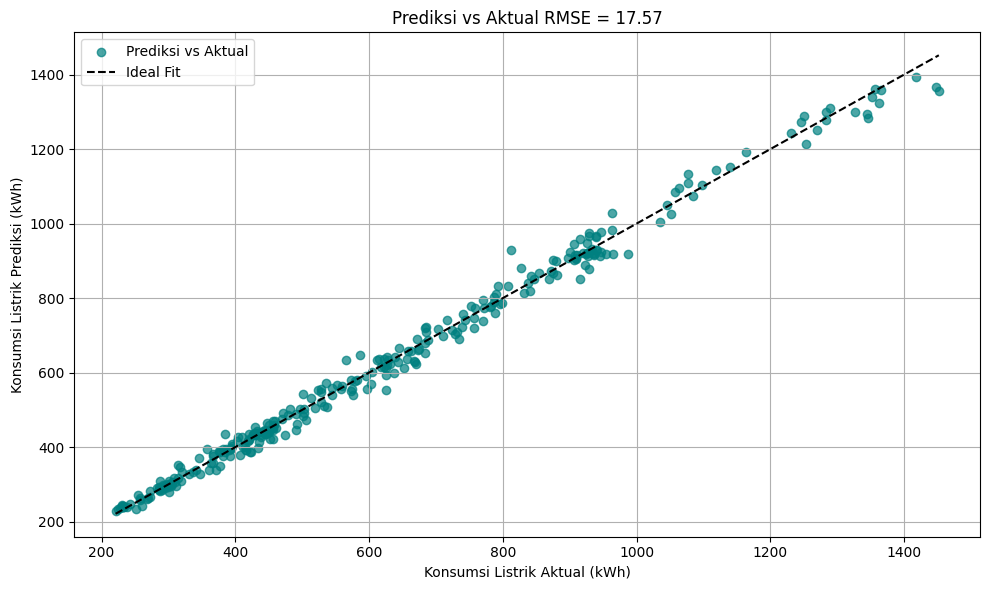

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Hitung metrik
mse = mean_squared_error(merged['electricity_consumption_actual'],
                        merged['electricity_consumption_predicted'])

rmse = np.sqrt(mse)

# Ambil subset data untuk visualisasi (agar plot tidak terlalu padat)
sample = merged.sample(300, random_state=42).sort_values(by='electricity_consumption_actual')

# Visualisasi
plt.figure(figsize=(10, 6))
plt.scatter(sample['electricity_consumption_actual'], sample['electricity_consumption_predicted'],
        color='teal', alpha=0.7, label='Prediksi vs Aktual')
plt.plot([sample['electricity_consumption_actual'].min(), sample['electricity_consumption_actual'].max()],
        [sample['electricity_consumption_actual'].min(), sample['electricity_consumption_actual'].max()],
        color='black', linestyle='--', label='Ideal Fit')

plt.xlabel("Konsumsi Listrik Aktual (kWh)")
plt.ylabel("Konsumsi Listrik Prediksi (kWh)")
plt.title(f"Prediksi vs Aktual RMSE = {rmse:.2f}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
